<center><h1>Estadística - Taller primera unidad</h1></center>
<ul>
<li><b>Matería:</b> Estadística </li>
<li><b>Docente: </b> Eliana Martha Bonalde Marcano</li>
<li><b>Integrantes:</b>
<ol>
<li>Efrain Camilo Quezada</li>
<li>Luis Felipe Cruz Ceballos</li>
<li>Anderson Andres Gonzalez Cortes</li>
<li>Cristian Leonardo Rueda Quintanilla</li>
<li>Camilo José Pereira Millán</li>
</li>
</ol>
</ul>
<center><h1>Información de la encuesta</h1></center>
<ul>
<li><b>Población: </b>Estudiantes UIS</li>
<li><b>Muestra: </b>Cincuenta estudiantes </li>
<li><b>Variable: </b> Moodle - Aula Virtual UIS</li>
<li><b>Clasificación de las variables de las encuestas: </b>Las variables usadas para la toma de datos de dicha encuesta fuerón <strong>variables cualitativas</strong>, de tipo <strong>nominal, ordinal y binaria</strong>.</li>
<li><a href="https://docs.google.com/forms/d/e/1FAIpQLScL-uK0NtXTGxGLVvFjxmD9hMzaXbqFaC-1OwVI6_BRE42eeA/viewform">Encuesta realizada</a></li>
</ul>

<center><h1>DESARROLLO DEL TALLER</h1></center>

#Importando Librerias - Pasos iniciales

In [2]:
#En esta direccion esta el archivo original donde se encuentran los resultados de la encuesta
#https://github.com/Luisfelipecruz/Python-practice/blob/8fb1dc3fc431d3113016c70f97ec60568d7ce1dd/Moodle.csv
#https://github.com/Luisfelipecruz/Python-practice/blob/8a32ab517dc3fe3e285740b074b387bbc4d2aaaa/Moodle_48.csv
#https://github.com/Luisfelipecruz/Python-practice/blob/e8070ad41a7f49d1485052a31be759c85cf50958/Moodle49.csv

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import io

#Importamos el documenteo .csv
url = "https://github.com/Luisfelipecruz/Python-practice/blob/e8070ad41a7f49d1485052a31be759c85cf50958/Moodle49.csv?raw=true"
download = requests.get(url).content
datos_encuesta_df = pd.read_csv(io.StringIO(download.decode('utf-8')))
datos_encuesta_df.head()

,Marca temporal,"Antes de la pandemia, ¿con qué frecuencia usaba el aula virtual?.",¿Conoce usted todas las herramientas que le ofrece el aula virtual?,¿Considera usted que durante la presencialidad remota el aula virtual ha mejorado mucho?,¿Considera usted que los profesores mantienen actualizando el contenido de los cursos?,¿Conoce alguna alternativa mejor que Moodle?,"En caso de conocer alguna, ¿Cuál es?",¿Qué tan intuitiva cree usted que es la página de Moodle?,"Del 1 al 5 responda las siguientes preguntas, siendo 1 muy malo o muy poco frecuente y 5 muy bueno o muy frecuente [¿Qué tan buena herramienta le parece para el desarrollo de las actividades del curso?]","Del 1 al 5 responda las siguientes preguntas, siendo 1 muy malo o muy poco frecuente y 5 muy bueno o muy frecuente [¿Qué le parece la organización y navegación de los cursos matriculados en la plataforma?]","Del 1 al 5 responda las siguientes preguntas, siendo 1 muy malo o muy poco frecuente y 5 muy bueno o muy frecuente [¿Con que frecuencia presenta pruebas dentro del aula virtual?]","Del 1 al 5 responda las siguientes preguntas, siendo 1 muy malo o muy poco frecuente y 5 muy bueno o muy frecuente [¿Con que frecuencia presenta actividades en moodle?]","Del 1 al 5 responda las siguientes preguntas, siendo 1 muy malo o muy poco frecuente y 5 muy bueno o muy frecuente [¿Con que frecuencia su profesor se comunica con usted por medio de Moodle?]","Del 1 al 5 responda las siguientes preguntas, siendo 1 muy malo o muy poco frecuente y 5 muy bueno o muy frecuente [¿Con qué frecuencia suele usted comunicarse con sus docentes por medio del Moodle?]",¿Considera usted que sus profesores están bien capacitados para el manejo del aula virtual?.,¿Qué tan buen manejo cree usted que le están dando los profesores a la plataforma?,¿Qué uso le da usted a la aulas virtuales?,"En las aulas virtuales que usted ha utilizado, encuentra (aparte de las actividades del ítem anterior):",¿En qué área cree usted que le ha sido más útil el aula virtual?,En cuanto a las pruebas:¿Cuál es el tipo de pregunta que más predomina?
0,2021/08/18 8:29:59 p. m. GMT-5,Poca frecuencia.,No,Un poco,No,No,NaN,Mala,3,3,5,4,2,2,No,No sé,Para presentar las pruebas del curso en cuesti...,Material audiovisual relacionado con el área e...,Materias de tu carrera (profesional: por arrib...,Todas las anteriores
1,2021/08/18 8:31:42 p. m. GMT-5,Mucha frecuencia.,Un poco,Sí,Sí,No,NaN,Buena,4,3,5,5,2,4,No,Bueno,Todas las anteriores.,Material audiovisual relacionado con el área e...,Materias de tu carrera (básicas),Todas las anteriores
2,2021/08/18 8:38:14 p. m. GMT-5,Mucha frecuencia.,Un poco,No,Sí,No,NaN,Muy buena,4,3,4,4,2,1,Si,Bueno,Todas las anteriores.,Material audiovisual relacionado con el área e...,Materias de tu carrera (profesional: por arrib...,Todas las anteriores
3,2021/08/18 8:44:10 p. m. GMT-5,Poca frecuencia.,No,Sí,Sí,No,NaN,Buena,5,5,5,3,3,1,Si,Bueno,Todas las anteriores.,Material audiovisual relacionado con el área e...,Materias de tu carrera (básicas),Todas las anteriores
4,2021/08/18 8:45:25 p. m. GMT-5,Poca frecuencia.,No,No,Sí,Si,Classroom,Buena,3,3,3,2,2,1,No,No sé,Para descargar el material de la clase.;Para d...,Material audiovisual relacionado con el área e...,Materias de ciencias básicas.,Todas las anteriores


#Organización de datos

In [217]:
preguntas=[
           'Antes de la pandemia, ¿con qué frecuencia usaba el aula virtual?.',
           '¿Conoce usted todas las herramientas que le ofrece el aula virtual?',
           '¿Considera usted que durante la presencialidad remota el aula virtual ha mejorado mucho?',
           '¿Considera usted que los profesores mantienen actualizando el contenido de los cursos?',
           '¿Conoce alguna alternativa mejor que Moodle?',
           'En caso de conocer alguna, ¿Cuál es?',
           '¿Qué tan intuitiva cree usted que es la página de Moodle?',
           'Qué tan buena herramienta le parece para el desarrollo de las actividades del curso',
           '¿Qué le parece la organización y navegación de los cursos matriculados en la plataforma?',
           '¿Con que frecuencia presenta pruebas dentro del aula virtual?',
           '¿Con que frecuencia presenta actividades en moodle?',
           '¿Con que frecuencia su profesor se comunica con usted por medio de Moodle?',
           '¿Con qué frecuencia suele usted comunicarse con sus docentes por medio del Moodle?', 
           '¿Considera usted que sus profesores están bien capacitados para el manejo del aula virtual?.',
           '¿Qué tan buen manejo cree usted que le están dando los profesores a la plataforma?',
           '¿Qué uso le da usted a la aulas virtuales?',
           'En las aulas virtuales que usted ha utilizado, encuentra (aparte de las actividades del ítem anterior):',
           '¿En qué área cree usted que le ha sido más útil el aula virtual?',
           'En cuanto a las pruebas:¿Cuál es el tipo de pregunta que más predomina?'
           ]

In [195]:
Resp_Prg_1=[('Mucha frecuencia.','A'),('Poca frecuencia.','B')]
Resp_Prg_2=[('Si','A'),('No','B'),('Un poco','C')]
Resp_Prg_3=[('Sí','A'),('No','B'),('Un poco','C')]
Resp_Prg_4=[('Sí','A'),('No','B')]
Resp_Prg_5=[('Si','A'),('No','B')]
Resp_Prg_6=[('Respuesta abierta','0')]
Resp_Prg_7=[('Muy buena','A'),('Buena','B'),('Mala','C'),('Muy mala','D')]
Resp_Prg_8=[('1','1'),('2','2'),('3','3'),('4','4'),('5','5')]
Resp_Prg_9=[('1','1'),('2','2'),('3','3'),('4','4'),('5','5')]
Resp_Prg_10=[('1','1'),('2','2'),('3','3'),('4','4'),('5','5')]
Resp_Prg_11=[('1','1'),('2','2'),('3','3'),('4','4'),('5','5')]
Resp_Prg_12=[('1','1'),('2','2'),('3','3'),('4','4'),('5','5')]
Resp_Prg_13=[('1','1'),('2','2'),('3','3'),('4','4'),('5','5')]
Resp_Prg_14=[('Si','A'),('No','B')]
Resp_Prg_15=[('Muy bueno','A'),('Bueno','B'),('Malo','C'),('Muy malo','D'),('No sé','E')]
Resp_Prg_16=[('Para presentar las pruebas del curso en cuestión.','S1'),
             ('Para descargar el material de la clase.','S2'),
             ('Para descargar talleres, grupos de problemas, tareas.','S3'),
             ('Todas las anteriores.','S4'),
             ('Otras actividades complementarias que el docente monta en el aula que resultan de interés.','S5'),
             ('Otro','S6')]
Resp_Prg_17=[('Material audiovisual relacionado con el área especializada de la materia.','S1'),
             ('Material que te hable de los aportes de la materia en tu formación profesional.','S2'),
             ('Reseñas históricas relacionadas con los aportes dados en el área.','S3')]
Resp_Prg_18=[('Materias de ciencias básicas.','S1'),
             ('Materias de tu carrera (básicas)','S2'),
             ('Materias de tu carrera (profesional: por arriba del 5to semestre).','S3'),
             ('Electivas','S4')]
Resp_Prg_19=[('Opción múltiple','A'),('Justificar','B'),('Todas las anteriores','C')]
Respuestas_Prg = [Resp_Prg_1,Resp_Prg_2,Resp_Prg_3,Resp_Prg_4,Resp_Prg_5,Resp_Prg_6,Resp_Prg_7,
            Resp_Prg_8,Resp_Prg_9,Resp_Prg_10,Resp_Prg_11,Resp_Prg_12,Resp_Prg_13,Resp_Prg_14,
            Resp_Prg_15,Resp_Prg_16,Resp_Prg_17,Resp_Prg_18,Resp_Prg_19]

In [196]:
data=[
      [preguntas[0],
       '1) '+Resp_Prg_1[0][0]+' 2) '+Resp_Prg_1[1][0],
       Resp_Prg_1[0][1]+','+Resp_Prg_1[1][1]],
      [preguntas[1],
       '1) '+Resp_Prg_2[0][0]+' 2) '+Resp_Prg_2[1][0]+' 3) '+Resp_Prg_2[2][0],
       Resp_Prg_2[0][1]+','+Resp_Prg_2[1][1]+','+Resp_Prg_2[2][1]], 
      [preguntas[2],
       '1) '+Resp_Prg_3[0][0]+' 2) '+Resp_Prg_3[1][0]+' 3) '+Resp_Prg_3[2][0],
       Resp_Prg_3[0][1]+','+Resp_Prg_3[1][1]+','+Resp_Prg_3[2][1]],
      [preguntas[3], 
       '1) '+Resp_Prg_4[0][0]+' 2) '+Resp_Prg_4[1][0], 
       Resp_Prg_4[0][1]+','+Resp_Prg_4[1][1]],
      [preguntas[4], 
       '1) '+Resp_Prg_5[0][0]+' 2) '+Resp_Prg_5[1][0], 
       Resp_Prg_5[0][1]+','+Resp_Prg_5[1][1]],
      [preguntas[5], 
       '1) '+Resp_Prg_6[0][0], 
       Resp_Prg_6[0][1]],
      [preguntas[6],
       '1) '+Resp_Prg_7[0][0]+' 2) '+Resp_Prg_7[1][0]+' 3) '+Resp_Prg_7[2][0]+' 4) '+Resp_Prg_7[3][0],
        Resp_Prg_7[0][1]+','+Resp_Prg_7[1][1]+','+Resp_Prg_7[2][1]+','+Resp_Prg_7[3][1]],
      [preguntas[7],
       Resp_Prg_8[0][0]+',  '+Resp_Prg_8[1][0]+',  '+Resp_Prg_8[2][0]+',  '+Resp_Prg_8[3][0]+',  '+Resp_Prg_8[4][0],
       Resp_Prg_8[0][1]+',  '+Resp_Prg_8[1][1]+',  '+Resp_Prg_8[2][1]+',  '+Resp_Prg_8[3][1]+',  '+Resp_Prg_8[4][1]],
      [preguntas[8],
       Resp_Prg_9[0][0]+',  '+Resp_Prg_9[1][0]+',  '+Resp_Prg_9[2][0]+',  '+Resp_Prg_9[3][0]+',  '+Resp_Prg_9[4][0],
       Resp_Prg_9[0][1]+',  '+Resp_Prg_9[1][1]+',  '+Resp_Prg_9[2][1]+',  '+Resp_Prg_9[3][1]+',  '+Resp_Prg_9[4][1]],
      [preguntas[9],
       Resp_Prg_10[0][0]+',  '+Resp_Prg_10[1][0]+',  '+Resp_Prg_10[2][0]+',  '+Resp_Prg_10[3][0]+',  '+Resp_Prg_10[4][0],
       Resp_Prg_10[0][1]+',  '+Resp_Prg_10[1][1]+',  '+Resp_Prg_10[2][1]+',  '+Resp_Prg_10[3][1]+',  '+Resp_Prg_10[4][1]],
      [preguntas[10],
       Resp_Prg_11[0][0]+',  '+Resp_Prg_11[1][0]+',  '+Resp_Prg_11[2][0]+',  '+Resp_Prg_11[3][0]+',  '+Resp_Prg_11[4][0],
       Resp_Prg_11[0][1]+',  '+Resp_Prg_11[1][1]+',  '+Resp_Prg_11[2][1]+',  '+Resp_Prg_11[3][1]+',  '+Resp_Prg_11[4][1]],
      [preguntas[11],
       Resp_Prg_12[0][0]+',  '+Resp_Prg_11[1][0]+',  '+Resp_Prg_12[2][0]+',  '+Resp_Prg_12[3][0]+',  '+Resp_Prg_12[4][0],
       Resp_Prg_12[0][1]+',  '+Resp_Prg_11[1][1]+',  '+Resp_Prg_12[2][1]+',  '+Resp_Prg_12[3][1]+',  '+Resp_Prg_12[4][1]],
      [preguntas[12],
       Resp_Prg_13[0][0]+',  '+Resp_Prg_13[1][0]+',  '+Resp_Prg_13[2][0]+',  '+Resp_Prg_13[3][0]+',  '+Resp_Prg_13[4][0],
       Resp_Prg_13[0][1]+',  '+Resp_Prg_13[1][1]+',  '+Resp_Prg_13[2][1]+',  '+Resp_Prg_13[3][1]+',  '+Resp_Prg_13[4][1]],
      [preguntas[13],
       '1) '+Resp_Prg_14[0][0]+' 2) '+Resp_Prg_14[1][0],
       Resp_Prg_14[0][1]+', '+Resp_Prg_14[1][1]],
      [preguntas[14],
       '1) '+Resp_Prg_15[0][0]+' 2) '+Resp_Prg_15[1][0]+' 3) '+Resp_Prg_15[2][0]+' 4) '+Resp_Prg_15[3][0]+' 5) '+Resp_Prg_15[4][0],
       Resp_Prg_15[0][1]+',  '+Resp_Prg_15[1][1]+',  '+Resp_Prg_15[2][1]+',  '+Resp_Prg_15[3][1]+',  '+Resp_Prg_15[4][1]],
      [preguntas[15],
       '1) '+Resp_Prg_16[0][0]+' 2) '+Resp_Prg_16[1][0]+' 3) '+Resp_Prg_16[2][0]+' 4) '+Resp_Prg_16[3][0]+' 5) '+Resp_Prg_16[4][0]+' 6) '+Resp_Prg_16[4][0],
       Resp_Prg_16[0][1]+', '+Resp_Prg_16[1][1]+', '+Resp_Prg_16[2][1]+', '+Resp_Prg_16[3][1]+', '+Resp_Prg_16[4][1]+', '+Resp_Prg_16[5][1]],
      [preguntas[16],
       '1) '+Resp_Prg_17[0][0]+' 2) '+Resp_Prg_17[1][0]+' 3) '+Resp_Prg_17[2][0],
       Resp_Prg_17[0][1]+', '+Resp_Prg_17[1][1]+', '+Resp_Prg_17[2][1]],
      [preguntas[17],
      '1) '+Resp_Prg_18[0][0]+' 2) '+Resp_Prg_18[1][0]+' 3) '+Resp_Prg_18[2][0]+' 4) '+Resp_Prg_18[3][0],
       Resp_Prg_18[0][1]+', '+Resp_Prg_18[1][1]+', '+Resp_Prg_18[2][1]+', '+Resp_Prg_18[3][1]],
      [preguntas[18],
        '1) '+Resp_Prg_19[0][0]+' 2) '+Resp_Prg_19[1][0]+' 3) '+Resp_Prg_19[2][0],
       Resp_Prg_19[0][1]+', '+Resp_Prg_19[1][1]+', '+Resp_Prg_19[2][1]]
      ]
resumen_df = pd.DataFrame(data, columns = ['PREGUNTA', 'POSIBLES RESPUESTAS', 'NORMALIZACION'])  

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

index = pd.Index(range(1, 20, 1))
resumen_new_index_df = resumen_df.set_index(index)
resumen_new_index_df


,PREGUNTA,POSIBLES RESPUESTAS,NORMALIZACION
1,"Antes de la pandemia, ¿con qué frecuencia usaba el aula virtual?.",1) Mucha frecuencia. 2) Poca frecuencia.,"A,B"
2,¿Conoce usted todas las herramientas que le ofrece el aula virtual?,1) Si 2) No 3) Un poco,"A,B,C"
3,¿Considera usted que durante la presencialidad remota el aula virtual ha mejorado mucho?,1) Sí 2) No 3) Un poco,"A,B,C"
4,¿Considera usted que los profesores mantienen actualizando el contenido de los cursos?,1) Sí 2) No,"A,B"
5,¿Conoce alguna alternativa mejor que Moodle?,1) Si 2) No,"A,B"
6,"En caso de conocer alguna, ¿Cuál es?",1) Respuesta abierta,0
7,¿Qué tan intuitiva cree usted que es la página de Moodle?,1) Muy buena 2) Buena 3) Mala 4) Muy mala,"A,B,C,D"
8,Qué tan buena herramienta le parece para el desarrollo de las actividades del curso,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"
9,¿Qué le parece la organización y navegación de los cursos matriculados en la plataforma?,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"
10,¿Con que frecuencia presenta pruebas dentro del aula virtual?,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"


In [218]:
datos_encuesta_df.columns = ['0','1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
datos_encuesta_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2021/08/18 8:29:59 p. m. GMT-5,Poca frecuencia.,No,Un poco,No,No,NaN,Mala,3,3,5,4,2,2,No,No sé,Para presentar las pruebas del curso en cuesti...,Material audiovisual relacionado con el área e...,Materias de tu carrera (profesional: por arrib...,Todas las anteriores
1,2021/08/18 8:31:42 p. m. GMT-5,Mucha frecuencia.,Un poco,Sí,Sí,No,NaN,Buena,4,3,5,5,2,4,No,Bueno,Todas las anteriores.,Material audiovisual relacionado con el área e...,Materias de tu carrera (básicas),Todas las anteriores
2,2021/08/18 8:38:14 p. m. GMT-5,Mucha frecuencia.,Un poco,No,Sí,No,NaN,Muy buena,4,3,4,4,2,1,Si,Bueno,Todas las anteriores.,Material audiovisual relacionado con el área e...,Materias de tu carrera (profesional: por arrib...,Todas las anteriores
3,2021/08/18 8:44:10 p. m. GMT-5,Poca frecuencia.,No,Sí,Sí,No,NaN,Buena,5,5,5,3,3,1,Si,Bueno,Todas las anteriores.,Material audiovisual relacionado con el área e...,Materias de tu carrera (básicas),Todas las anteriores
4,2021/08/18 8:45:25 p. m. GMT-5,Poca frecuencia.,No,No,Sí,Si,Classroom,Buena,3,3,3,2,2,1,No,No sé,Para descargar el material de la clase.;Para d...,Material audiovisual relacionado con el área e...,Materias de ciencias básicas.,Todas las anteriores
5,2021/08/18 9:27:10 p. m. GMT-5,Poca frecuencia.,No,Sí,No,No,NaN,Mala,2,2,2,2,2,1,No,No sé,Para presentar las pruebas del curso en cuestión.,Reseñas históricas relacionadas con los aporte...,Electivas,Justificar
6,2021/08/18 9:27:36 p. m. GMT-5,Mucha frecuencia.,Un poco,No,Sí,Si,Schoology,Buena,3,3,3,3,2,1,Si,Bueno,Para presentar las pruebas del curso en cuestión.,Material audiovisual relacionado con el área e...,Materias de tu carrera (profesional: por arrib...,Todas las anteriores
7,2021/08/18 9:36:41 p. m. GMT-5,Poca frecuencia.,No,No,No,Si,Google Classroom y Schoology,Buena,3,3,2,3,1,1,Si,Bueno,Para presentar las pruebas del curso en cuestión.,Material audiovisual relacionado con el área e...,Electivas,Opción múltiple
8,2021/08/19 3:19:48 a. m. GMT-5,Poca frecuencia.,Un poco,Sí,No,No,NaN,Buena,3,3,2,3,2,2,No,Bueno,Todas las anteriores.;Otras actividades comple...,Material audiovisual relacionado con el área e...,Materias de ciencias básicas.,Todas las anteriores
9,2021/08/19 10:55:51 a. m. GMT-5,Poca frecuencia.,Un poco,Sí,Sí,No,NaN,Buena,4,4,4,4,4,4,Si,Bueno,Todas las anteriores.,Material que te hable de los aportes de la mat...,Materias de tu carrera (profesional: por arrib...,Opción múltiple


In [219]:
for index, row in datos_encuesta_df.iterrows():
  for i in range(len(Respuestas_Prg)+1):
    for posibles_resp in Respuestas_Prg[i-1]:
      if(str(posibles_resp[0]) in str(row[i])):
        datos_encuesta_df.loc[datos_encuesta_df[str(i)] == str(row[i]), str(i)] = str(posibles_resp[1])

In [234]:
pd.set_option("max_colwidth", 50)
datos_encuesta_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2021/08/18 8:29:59 p. m. GMT-5,B,B,C,B,B,NaN,C,3,3,5,4,2,2,B,E,S1,S1,S3,C
1,2021/08/18 8:31:42 p. m. GMT-5,A,C,A,A,B,NaN,B,4,3,5,5,2,4,B,B,S4,S1,S2,C
2,2021/08/18 8:38:14 p. m. GMT-5,A,C,B,A,B,NaN,A,4,3,4,4,2,1,A,B,S4,S1,S3,C
3,2021/08/18 8:44:10 p. m. GMT-5,B,B,A,A,B,NaN,B,5,5,5,3,3,1,A,B,S4,S1,S2,C
4,2021/08/18 8:45:25 p. m. GMT-5,B,B,B,A,A,Classroom,B,3,3,3,2,2,1,B,E,S2,S1,S1,C


#Tratamiento de datos

<p>En ésta sección procedemo a realizar todo con respecto al tratamiento de los datos, lo cuales seran los siguientes:</p>
<ul>
<li>Medidas de tendencia central</li>
<li>Variabilidad</li>
<li>Agrupamiento de datos</li>
</ul>

##Medidas de tendencia central <p><i>Definición.</i> Son aquellas cantidades que <b>buscan un valor central</b> que
represente a los datos.</p>

###Media <p>La<i><b> media muestral</b></i> es el promedio aritmético de esta sumatoria   $\frac{\sum_{i=0}^{n}x_{i}}{n}$</p>

In [ ]:
datos_encuesta_df


NameError: ignored

###Moda
<p>La moda muestra hacia que valor tienden los datos a agruparse, el valor que se repite con mayor frecuencía. </p>

###Mediana
<p>Valor central de un grupo de números ordenados por tamaño. Si la cantidad de elementos es par, la mediana es el promedio de los dos números centrales.</p>

##Variabilidad
<p><i>Definición. </i>Estos parámetros miden en qué medida se dispersan los valores de una muestra alrededor de un valor central</p>

###Varianza
<p>La varianza es la media de las diferencias con la media elevadas al cuadrado.</p>

###Desviación estándar
<p>La desviación estandar es la raíz cuadrada de la varianza de dicha población.</p>

# seccion parte 1


In [221]:
datos_encuesta_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,49,49,49,49,49,49,9,49,49,49,49,49,49,49,49,49,49,49,49,49
unique,49,2,3,3,2,2,9,4,5,5,5,5,5,5,2,4,3,3,4,3
top,2021/08/19 10:58:02 a. m. GMT-5,B,C,A,A,B,Sena,B,3,3,4,4,2,1,A,B,S4,S1,S1,C
freq,1,35,23,20,32,37,1,34,19,19,14,17,20,19,30,27,27,40,23,27


In [222]:
primer_set_respuestas = datos_encuesta_df[['1','2','3','4','5','7',]]
primer_set_respuestas.describe()

,1,2,3,4,5,7
count,49,49,49,49,49,49
unique,2,3,3,2,2,4
top,B,C,A,A,B,B
freq,35,23,20,32,37,34


In [ ]:
grpd = datos_encuesta_df[['1','2','3','4','5','7']].groupby(['1','2','3','4','5','7']).size().to_frame('size')
grpd.head()

In [ ]:
df_ord_group = grpd.sort_values(by=['size'], ascending='true')
df_ord_group.head()

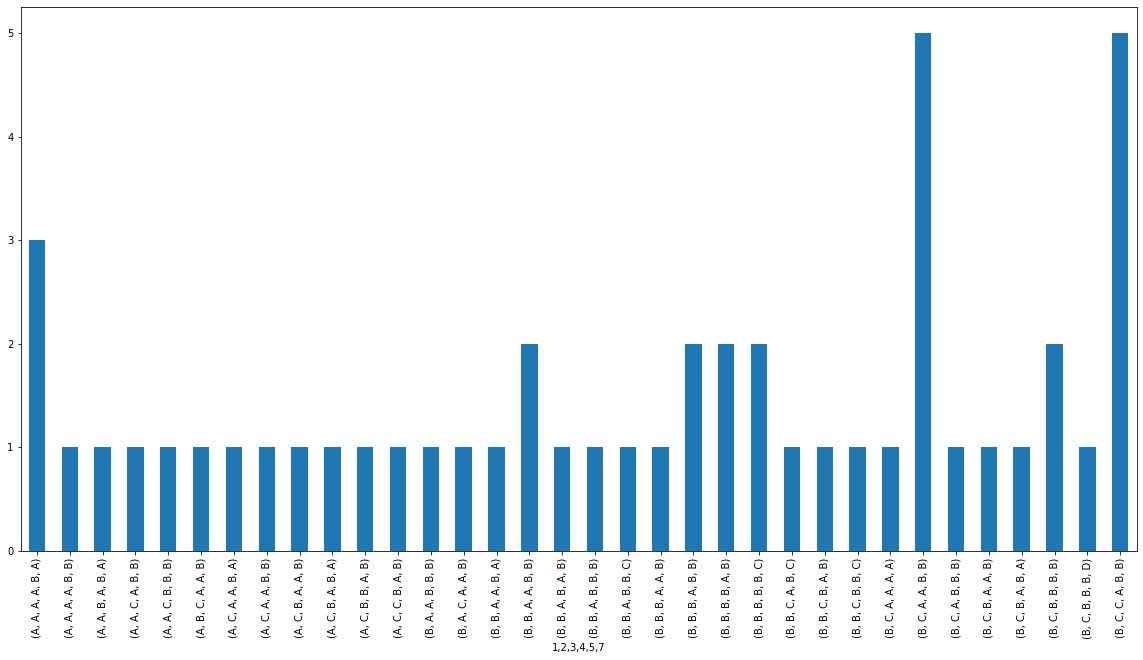

In [239]:

fig, ax = plt.subplots(1,1,figsize=(20,10))
ax= plt.subplot(1,1,1)
datos_encuesta_df.groupby(['1','2','3','4','5','7']).size().plot.bar(ax=ax)

#respuesta_1=[B,C,C,A,B,B,5]

'\nfrom google.colab import files\nfig.savefig("mapas_1.png",dpi=900)\nfiles.download("mapas_1.png") '

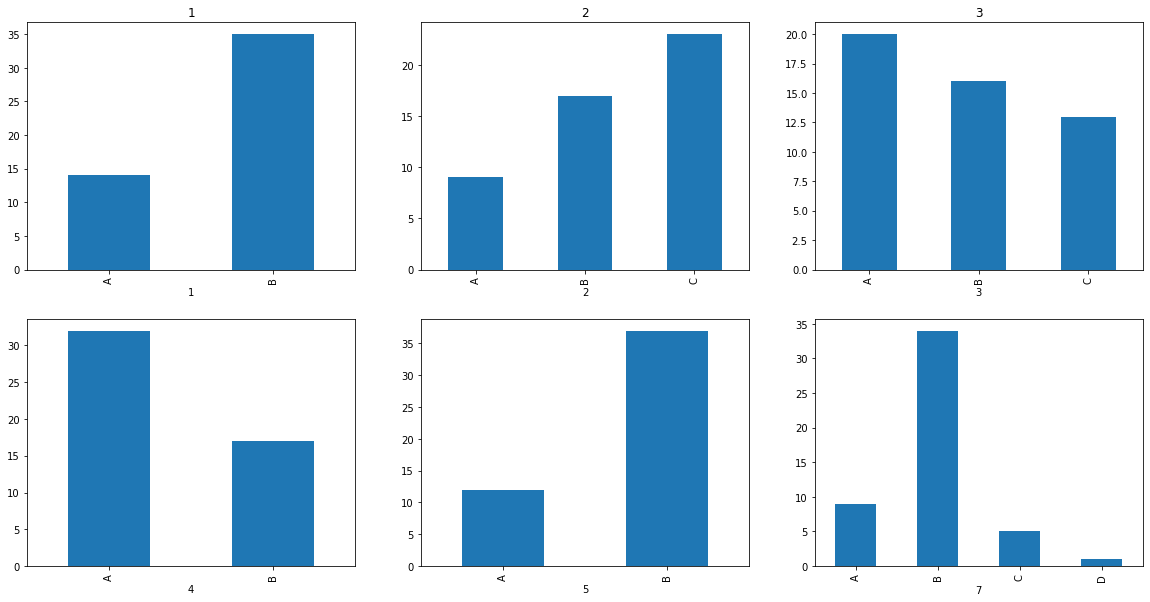

In [237]:
import matplotlib.pyplot as plt

#fig = plt.subplots(2,3)
fig, ax = plt.subplots(2,3,figsize=(20,10))

ax= plt.subplot(2,3,1)
datos_encuesta_df.groupby(['1']).size().plot.bar(ax=ax)
ax.set_title('1')

ax= plt.subplot(2,3,2)
datos_encuesta_df.groupby(['2']).size().plot.bar(ax=ax)
ax.set_title('2')

ax= plt.subplot(2,3,3)
datos_encuesta_df.groupby(['3']).size().plot.bar(ax=ax)
ax.set_title('3')

ax= plt.subplot(2,3,4)
datos_encuesta_df.groupby(['4']).size().plot.bar(ax=ax)

ax= plt.subplot(2,3,5)
datos_encuesta_df.groupby(['5']).size().plot.bar(ax=ax)

ax= plt.subplot(2,3,6)
datos_encuesta_df.groupby(['7']).size().plot.bar(ax=ax)

'''
from google.colab import files
fig.savefig("mapas_1.png",dpi=900)
files.download("mapas_1.png") '''

#Seccion parte 2

In [226]:
preguntas_seccion_2 =resumen_new_index_df.loc[8:13,'PREGUNTA':'NORMALIZACION']
preguntas_seccion_2

,PREGUNTA,POSIBLES RESPUESTAS,NORMALIZACION
8,Qué tan buena herramienta le parece para el de...,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"
9,¿Qué le parece la organización y navegación de...,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"
10,¿Con que frecuencia presenta pruebas dentro de...,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"
11,¿Con que frecuencia presenta actividades en mo...,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"
12,¿Con que frecuencia su profesor se comunica co...,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"
13,¿Con qué frecuencia suele usted comunicarse co...,"1, 2, 3, 4, 5","1, 2, 3, 4, 5"


In [228]:
datos_encuesta_df[['8','9','10','11','12','13']].describe()

,8,9,10,11,12,13
count,49,49,49,49,49,49
unique,5,5,5,5,5,5
top,3,3,4,4,2,1
freq,19,19,14,17,20,19


In [229]:
datos_encuesta_df
df_col8 = datos_encuesta_df.iloc[:, 8]
df_col9 = datos_encuesta_df.iloc[:, 9]
df_col10 = datos_encuesta_df.iloc[:, 10]
df_col11 = datos_encuesta_df.iloc[:, 11]
df_col12 = datos_encuesta_df.iloc[:, 12]
df_col13 = datos_encuesta_df.iloc[:, 13]

In [230]:
analis_realizados = ['media','mediana','moda','varianza','desviación estandar','Q1','Q3','IQR']
resultados_col8 = [df_col8.mean(),df_col8.median(),stats.mode(df_col8.to_numpy()),df_col8.var(),df_col8.std(),np.percentile(df_col8,25),np.percentile(df_col8,75),np.percentile(df_col8,75)-np.percentile(df_col8,25)]
resultados_col9 =  [df_col9.mean(),df_col9.median(),stats.mode(df_col9.to_numpy()),df_col9.var(),df_col9.std(),np.percentile(df_col9,25),np.percentile(df_col9,75),np.percentile(df_col9,75)-np.percentile(df_col9,25)]
resultados_col10 =  [df_col10.mean(),df_col10.median(),stats.mode(df_col10.to_numpy()),df_col10.var(),df_col10.std(),np.percentile(df_col10,25),np.percentile(df_col10,75),np.percentile(df_col10,75)-np.percentile(df_col10,25)]
resultados_col11 =  [df_col11.mean(),df_col11.median(),stats.mode(df_col11.to_numpy()),df_col11.var(),df_col11.std(),np.percentile(df_col11,25),np.percentile(df_col11,75),np.percentile(df_col11,75)-np.percentile(df_col11,25)]
resultados_col12 =  [df_col12.mean(),df_col12.median(),stats.mode(df_col12.to_numpy()),df_col12.var(),df_col12.std(),np.percentile(df_col12,25),np.percentile(df_col12,75),np.percentile(df_col12,75)-np.percentile(df_col12,25)]
resultados_col13 =  [df_col13.mean(),df_col13.median(),stats.mode(df_col13.to_numpy()),df_col13.var(),df_col13.std(),np.percentile(df_col13,25),np.percentile(df_col13,75),np.percentile(df_col13,75)-np.percentile(df_col13,25)]
resultados_tuplas= list(zip(analis_realizados,resultados_col8,resultados_col9,resultados_col10,resultados_col11,resultados_col12,resultados_col13))
df_escenario_2 = pd.DataFrame(resultados_tuplas, columns=['metodo','pregunta 8','pregunta 9','pregunta 10','pregunta 11','pregunta 12','pregunta 13'])  
df_escenario_2

,metodo,pregunta 8,pregunta 9,pregunta 10,pregunta 11,pregunta 12,pregunta 13
0,media,3.2449,3.16327,3.42857,3.28571,2.46939,2.32653
1,mediana,3,3,4,3,2,2
2,moda,"([3], [19])","([3], [19])","([4], [14])","([4], [17])","([2], [20])","([1], [19])"
3,varianza,1.06378,1.22279,1.41667,1.20833,1.58759,1.93282
4,desviación estandar,1.03139,1.1058,1.19024,1.09924,1.25999,1.39026
5,Q1,3,3,2,3,2,1
6,Q3,4,4,4,4,3,3
7,IQR,1,1,2,1,1,2


Text(0.5, 1.0, 'Violin plot')

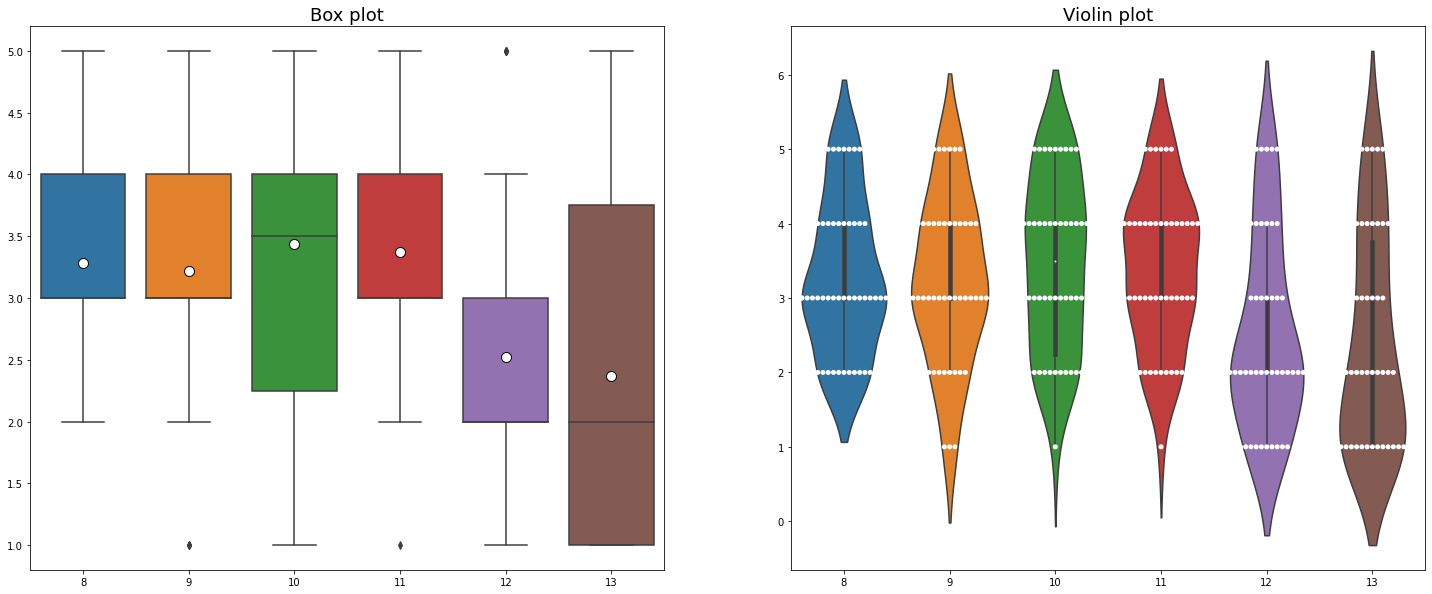

In [231]:
seccion_2_boxPlot=datos_encuesta_df.loc[1:46,'8':'13']

fig, axes  = plt.subplots(1,2,figsize=(25,10))

sns.boxplot(ax=axes[0], data=seccion_2_boxPlot,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
axes[0].set_title('Box plot', size=18)

sns.violinplot(ax=axes[1],kind="violin",data=seccion_2_boxPlot)
sns.swarmplot( data=seccion_2_boxPlot,color="white", edgecolor="gray")
axes[1].set_title('Violin plot', size=18)

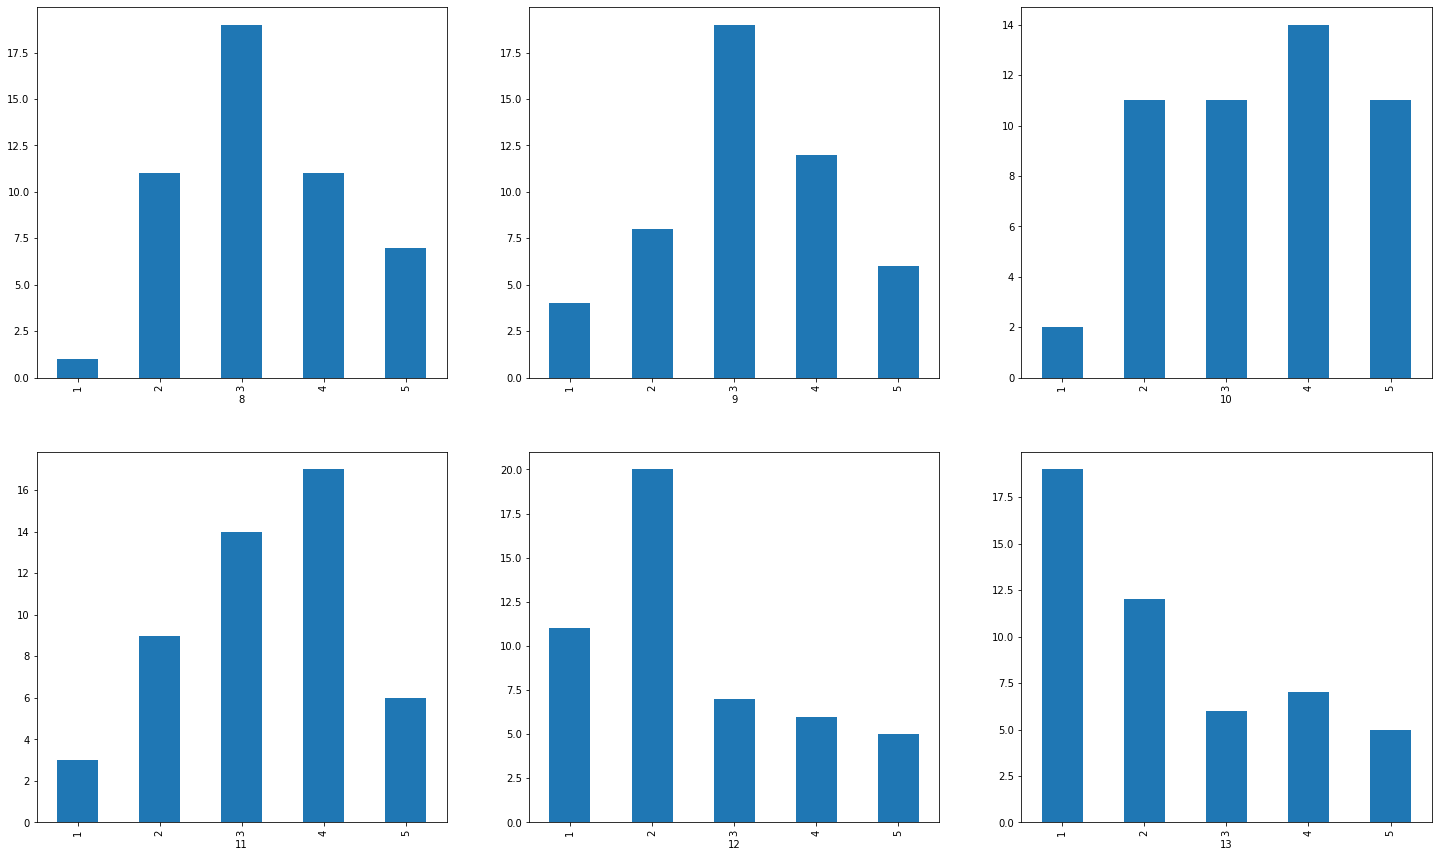

In [232]:
#fig = plt.subplots(2,3)
fig, ax = plt.subplots(2,3,figsize=(25,15))

ax= plt.subplot(2,3,1)
datos_encuesta_df.groupby(['8']).size().plot.bar(ax=ax)

ax= plt.subplot(2,3,2)
datos_encuesta_df.groupby(['9']).size().plot.bar(ax=ax)

ax= plt.subplot(2,3,3)
datos_encuesta_df.groupby(['10']).size().plot.bar(ax=ax)

ax= plt.subplot(2,3,4)
datos_encuesta_df.groupby(['11']).size().plot.bar(ax=ax)

ax= plt.subplot(2,3,5)
datos_encuesta_df.groupby(['12']).size().plot.bar(ax=ax)

ax= plt.subplot(2,3,6)
datos_encuesta_df.groupby(['13']).size().plot.bar(ax=ax)


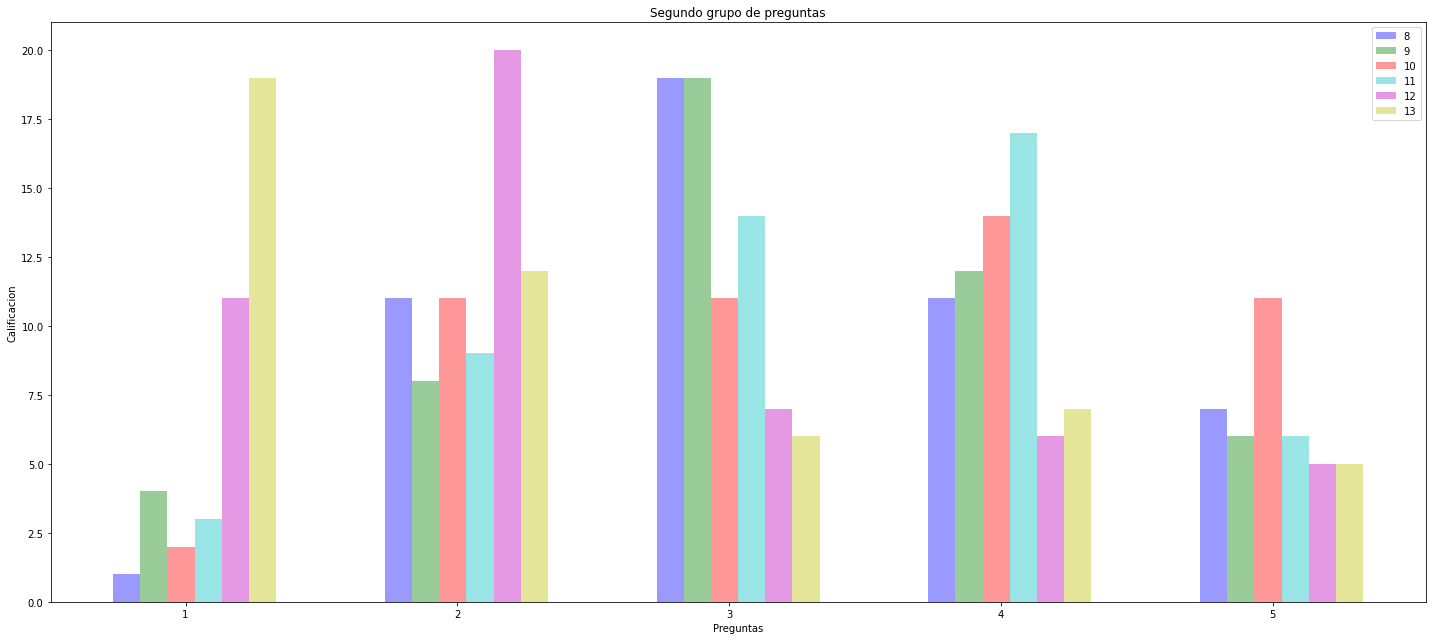

In [249]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 5

fig, ax = plt.subplots(figsize=(20,9))
index = np.arange(n_groups)
bar_width = 0.10
opacity = 0.4

rects1 = plt.bar(index, datos_encuesta_df.groupby(['8']).size(), bar_width,alpha=opacity,color='b',label='8')
rects2 = plt.bar(index + bar_width, datos_encuesta_df.groupby(['9']).size(), bar_width,alpha=opacity,color='g',label='9')
rects3 = plt.bar(index+bar_width+bar_width, datos_encuesta_df.groupby(['10']).size(), bar_width,alpha=opacity,color='r',label='10')
rects4 = plt.bar(index+bar_width+bar_width+bar_width, datos_encuesta_df.groupby(['11']).size(), bar_width,alpha=opacity,color='c',label='11')
rects5 = plt.bar(index+bar_width+bar_width+bar_width+bar_width, datos_encuesta_df.groupby(['12']).size(), bar_width,alpha=opacity, color='m',label='12')
rects6 = plt.bar(index+bar_width+bar_width+bar_width+bar_width+bar_width, datos_encuesta_df.groupby(['13']).size(), bar_width,alpha=opacity,color='y',label='13')

plt.xlabel('Preguntas')
plt.ylabel('Calificacion')
plt.title('Segundo grupo de preguntas')
plt.xticks(index + bar_width+bar_width+bar_width / 6, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

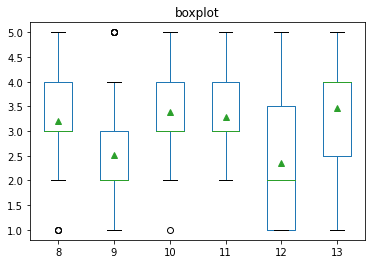

In [122]:
seccion_2_boxPlot=datos_encuesta_df.loc[1:46,'8':'13']

import matplotlib.pyplot as plt


DF = pd.DataFrame({'8': datos_encuesta_df.iloc[:, 8],
                   '9': datos_encuesta_df.iloc[:, 9],
                   '10': datos_encuesta_df.iloc[:, 10],
                   '11': datos_encuesta_df.iloc[:, 11],
                   '12': datos_encuesta_df.iloc[:, 12],
                   '13': datos_encuesta_df.iloc[:, 13]})

ax = DF[['8', '9','10','11','12','13']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

In [ ]:
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])